In [81]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
from scipy.stats import ttest_ind
import os
import glob

Import the data with the similarity and complementarity of the companies in a deal.

In [83]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

Specify the name of the file and the directory where the file is located.

In [94]:
path = find('similaritiescomplements.csv','C://')

In [95]:
data= pd.read_csv(path)

In [96]:
data.sort_values(by='Similarity')

,Unnamed: 0,Acquirer,AcquirerIndustry,Industry,Mean Similarity Other Acquirers,Mean Similarity Other Targets,Period,Similarity,Target,TargetIndustry,Complementarity,Mean Complementarity Other Acquirers,Mean Complementarity Other Targets,HCF
0,150,Cigna Corp,Healthcare,Different,0.510252,0.517983,after,0.458542,FirstAssist Insurance Services,Financials,0.251711,0.118668,0.094148,0.322746
1,203,Sun Life Financial Inc,Financials,Same,0.512154,0.531460,after,0.472684,Ryan Labs Inc,Financials,0.375199,0.188598,0.158091,0.428987
2,39,UnitedHealth Group Inc,Healthcare,Same,0.548664,0.516796,before,0.475172,Catamaran Corp,Healthcare,0.126606,0.203147,0.121976,0.126903
3,35,BUPA Australia Health Pty Ltd,Healthcare,Same,0.572066,0.507592,before,0.483643,Innovative Care Ltd-Aged Care,Healthcare,0.179992,0.209598,0.096238,0.079746
4,84,UnitedHealth Group Inc,Healthcare,Different,0.569978,0.516306,before,0.485526,Humedica Inc,High Technology,0.142219,0.226693,0.122269,0.179059
5,200,Randall & Quilter Invest Hldg,Financials,Different,0.668593,0.476128,after,0.486868,Royal London Gen Ins Co Ltd,Healthcare,0.009372,0.245172,0.011516,0.369791
6,18,Inovalon Holdings Inc,High Technology,Different,0.558928,0.535808,before,0.488770,Avalere Health LLC,Healthcare,0.409289,0.237747,0.192191,0.247036
7,183,Spectrum Equity Investors LP,Financials,Same,0.541555,0.543365,after,0.495280,iSelect Ltd,Financials,0.083208,0.099861,0.129180,0.213499
8,29,Best Doctors Inc,Healthcare,Same,0.588329,0.527290,before,0.498384,Rise Health Inc,Healthcare,0.345721,0.206415,0.157702,0.607788
9,127,UnitedHealth Group Inc,Healthcare,Same,0.579979,0.526215,after,0.499416,American Health Network Inc,Healthcare,0.217260,0.155656,0.121047,0.206215


Plot the Similarity vs Complementarity, Similarity vs Target-Neutral-Acquirer Patterns, and Complementarity vs Target-Neutral-Acquirer Patterns

Text(0.5, 0, 'Similarity')

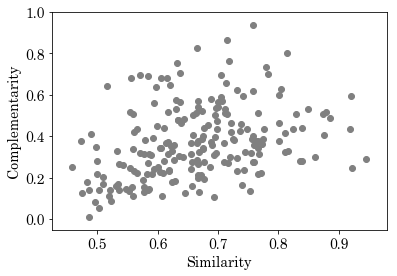

In [27]:
one = data['Similarity']
two = data['Complementarity']
plt.scatter(one, two, color='grey')
plt.xticks(fontname="century", fontsize="14")
plt.yticks(fontname="century", fontsize="14")
plt.ylabel("Complementarity",fontname="century", fontsize="14")
plt.xlabel("Similarity",fontname="century", fontsize="14")

Text(0.5, 0, 'Similarity')

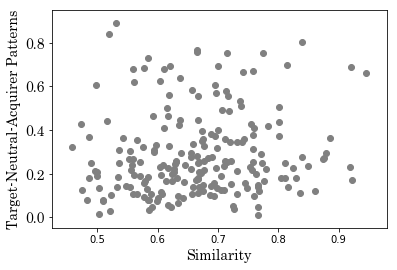

In [26]:
one = data['Similarity']
two = data['HCF']
plt.scatter(one, two, color='grey')
plt.yticks(fontname="century", fontsize="14")
plt.ylabel("Target-Neutral-Acquirer Patterns",fontname="century", fontsize="14")
plt.xlabel("Similarity",fontname="century", fontsize="14")

Text(0.5, 0, 'Complementarity')

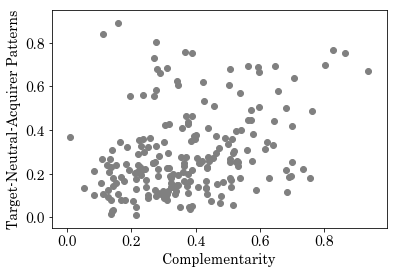

In [24]:
one = data['Complementarity']
two = data['HCF']
plt.scatter(one, two, color='grey')
plt.xticks(fontname="century", fontsize="14")
plt.yticks(fontname="century", fontsize="14")
plt.ylabel("Target-Neutral-Acquirer Patterns",fontname="century", fontsize="14")
plt.xlabel("Complementarity",fontname="century", fontsize="14")

Color values by same-industry or cross-industry category.

Text(0, 0.5, 'Complementarity')

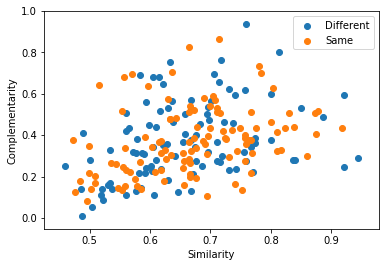

In [17]:
groups = data.groupby('Industry')
for name, group in groups:
    plt.scatter(group['Similarity'], group['Complementarity'], label=name)
plt.legend()
plt.xlabel('Similarity')
plt.ylabel('Complementarity')

Text(0, 0.5, 'Target-Neutral-Acquirer Patterns')

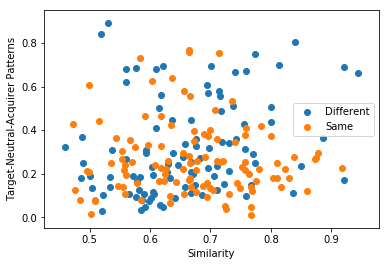

In [18]:
groups = data.groupby('Industry')
for name, group in groups:
    plt.scatter(group['Similarity'], group['HCF'], label=name)
plt.legend()
plt.xlabel('Similarity')
plt.ylabel('Target-Neutral-Acquirer Patterns')

Text(0, 0.5, 'Target-Neutral-Acquirer Patterns')

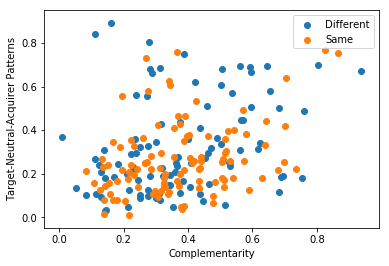

In [19]:
groups = data.groupby('Industry')
for name, group in groups:
    plt.scatter(group['Complementarity'], group['HCF'], label=name)
plt.legend()
plt.xlabel('Complementarity')
plt.ylabel('Target-Neutral-Acquirer Patterns')

In [4]:
pearsonr(data['Similarity'], data['Complementarity'])

(0.3403701744819109, 4.896783959812375e-07)

In [23]:
pearsonr(data['Complementarity'], data['HCF'])

(0.31796029177193186, 2.8676163618222676e-06)

In [22]:
pearsonr(data['Similarity'], data['HCF'])

(0.10548374526758264, 0.1294248288325143)

In [10]:
data[data['Target']=='Block Vision Inc']['HCF']

139    0.490257
185    0.372934
Name: HCF, dtype: float64